In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
dataset = pd.get_dummies(dataset,drop_first = True)
dataset = dataset.astype(int)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27,0,16884,0,1
1,18,33,1,1725,1,0
2,28,33,3,4449,1,0
3,33,22,0,21984,1,0
4,32,28,0,3866,1,0
...,...,...,...,...,...,...
1333,50,30,3,10600,1,0
1334,18,31,0,2205,0,0
1335,18,36,0,1629,0,0
1336,21,25,0,2007,0,0


In [4]:
independent = dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27,0,0,1
1,18,33,1,1,0
2,28,33,3,1,0
3,33,22,0,1,0
4,32,28,0,1,0
...,...,...,...,...,...
1333,50,30,3,1,0
1334,18,31,0,0,0
1335,18,36,0,0,0
1336,21,25,0,0,0


In [5]:
dependent = dataset[["charges"]]
dependent

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


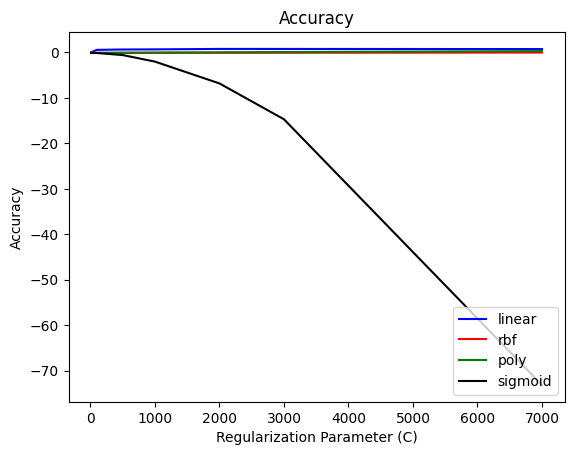

Best parameters for Support Vector Regressor: Kernel: linear, C: 2000 with an accuracy of (0.767813229279356, 2000, 'linear')


,C,linear,rbf,poly,sigmoid
1,C 10,0.022506,-0.08521,-0.082239,-0.099652
2,C 100,0.563729,-0.113243,-0.084659,-0.132517
3,C 500,0.64177,-0.10929,-0.064037,-0.582106
4,C 1000,0.669795,-0.102105,-0.032889,-2.022042
5,C 2000,0.767813,-0.090715,0.02603,-6.818809
6,C 3000,0.764471,-0.079182,0.083426,-14.702022
7,C 7000,0.734434,-0.028374,0.291094,-73.122034


In [6]:
from mltoolkit import Regression as regressor

acc_table, max_acc, min_acc, best_param = regressor.svm(independent, dependent)
acc_table

In [7]:
acc_table, max_acc, min_acc, best_param = regressor.knn(independent, dependent)
acc_table
print(best_param)

Best parameters for KNN Regressor: {'n_neighbors': 5, 'algorithm': 'auto', 'weights': 'distance'} with an accuracy of 0.3247874680677646
{'n_neighbors': 5, 'algorithm': 'auto', 'weights': 'distance'}


In [8]:
acc_table, max_acc, min_acc, best_param = regressor.decision_tree(independent, dependent)
acc_table
print(best_param)

Best parameters for Decision Tree Regressor: {'Criterion': 'absolute_error', 'Max Features': None, 'Splitter': 'random'} with an accuracy of 0.7776839284955914
{'Criterion': 'absolute_error', 'Max Features': None, 'Splitter': 'random'}


In [9]:
acc_table, max_acc, min_acc, best_param = regressor.random_forest(independent, dependent)
acc_table
print(best_param)

Best parameters for Random Forest Regressor: {'Criterion': 'absolute_error', 'Max Features': 'sqrt', 'n_estimators': 100} with an accuracy of 0.8819688006694887
{'Criterion': 'absolute_error', 'Max Features': 'sqrt', 'n_estimators': 100}


In [10]:
reg_report = regressor.fit(independent, dependent)
reg_report

As a result Random Forest, served as a best model with the R² value of 0.8650239736269336


,Metrics,Random Forest,Linear Regression,Poisson Regression,Decision Tree,Support Vector Machine,KNN
1,MSE,21249983.049189,32304679.499094,30757741.967868,40814778.677363,172821773.971895,112965815.146866
2,MAE,4609.77039,5683.720568,5545.966279,6388.64451,13146.169555,10628.537771
3,R2,2719.90637,3985.71256,3748.157793,2935.1199,8532.534486,7417.95403
4,RMSE,0.865024,0.794807,0.804632,0.740752,-0.097732,0.282462
5,R2ADJ,0.864347,0.793777,0.803653,0.739452,-0.103238,0.278863


In [11]:
reg_report = regressor.fit_save(independent, dependent)
reg_report

As a result Random Forest, served as a best model with the R² value of 0.8707585753193197

Saving the best model ...........

Model Saved succesfully

Finalized_model_Random Forest_Reg.sav is ready for deployment


,Metrics,Random Forest,Linear Regression,Poisson Regression,Decision Tree,Support Vector Machine,KNN
1,MSE,20347154.65787,32304679.499094,30757741.967868,42119270.743781,172821773.971895,112965815.146866
2,MAE,4510.782045,5683.720568,5545.966279,6489.936112,13146.169555,10628.537771
3,R2,2650.646079,3985.71256,3748.157793,3019.160199,8532.534486,7417.95403
4,RMSE,0.870759,0.794807,0.804632,0.732466,-0.097732,0.282462
5,R2ADJ,0.87011,0.793777,0.803653,0.731124,-0.103238,0.278863
